# **텍스트데이터분석 프로젝트**
#### **주제** : 게임사 5곳 특징, 전략, 사회적 가치 등 비교 분석 (넥슨, 크래프톤, 넷마블, 라이엇코리아, 엔씨소프트)
#### **1. Data Load**

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('display.max_colwidth', 200)

In [3]:
df = pd.read_csv('total_df.csv')

#### **2. WordCloud**
- 뉴스와 블로그 따로 워드클라우드 생성
- body column은 중요성이 낮은 단어들이 빈번하게 등장하기 때문에 제외, title column으로만 분석 진행
##### *2-1. Krafton WordCloud*

c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


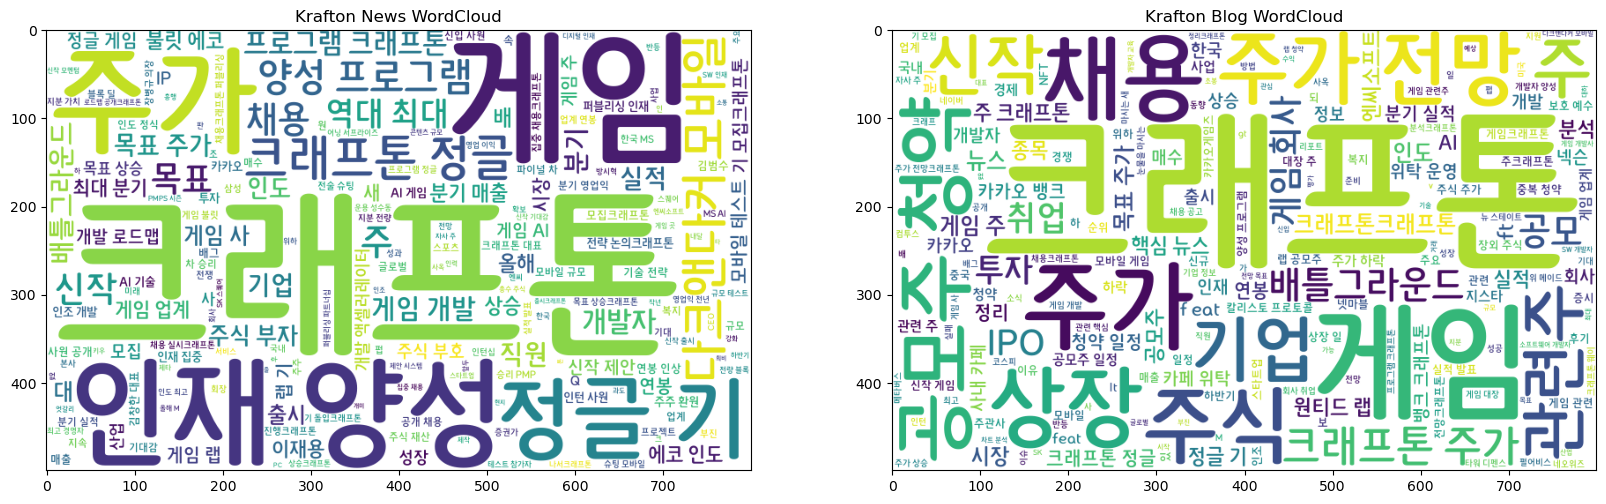

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from kiwipiepy import Kiwi

## 넷마블체 다운로드 받아서 사용
font_path = 'C:\\Users\\82109\\appdata\\local\\microsoft\\windows\\fonts\\netmarbleM.ttf'
kiwi = Kiwi(typos='basic')  ## 오탈자 제거 기능 추가

def extract_pos(text):
    tokens = []
    results = kiwi.analyze(text)
    for result in results:
        for token in result[0]:
            if token.tag in ['NNG', 'NNP', 'VV', 'VA', 'SL', 'SN']:  ## 동사, 명사, 형용사, 영어, 숫자만 남기기 
                tokens.append(token.form)
    return ' '.join(tokens)

## krafton 내용만 추출
krafton_news = df.loc[df.category == 'krafton_news']
krafton_blog = df.loc[df.category == 'krafton_blog']
news = ''
blog = ''

for _, row in krafton_news.iterrows():
    news += extract_pos(row['title'])
for _, row in krafton_blog.iterrows():
    blog += extract_pos(row['title'])

## WordCloud 설정
news_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(news)
blog_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(blog)

krafton_news_arr = news_cloud.to_array()
krafton_blog_arr = blog_cloud.to_array()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(krafton_news_arr)
ax1.set_title('Krafton News WordCloud')
ax2.imshow(krafton_blog_arr)
ax2.set_title('Krafton Blog WordCloud')
plt.show()

##### *2-2. Nexon WordCloud*

c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


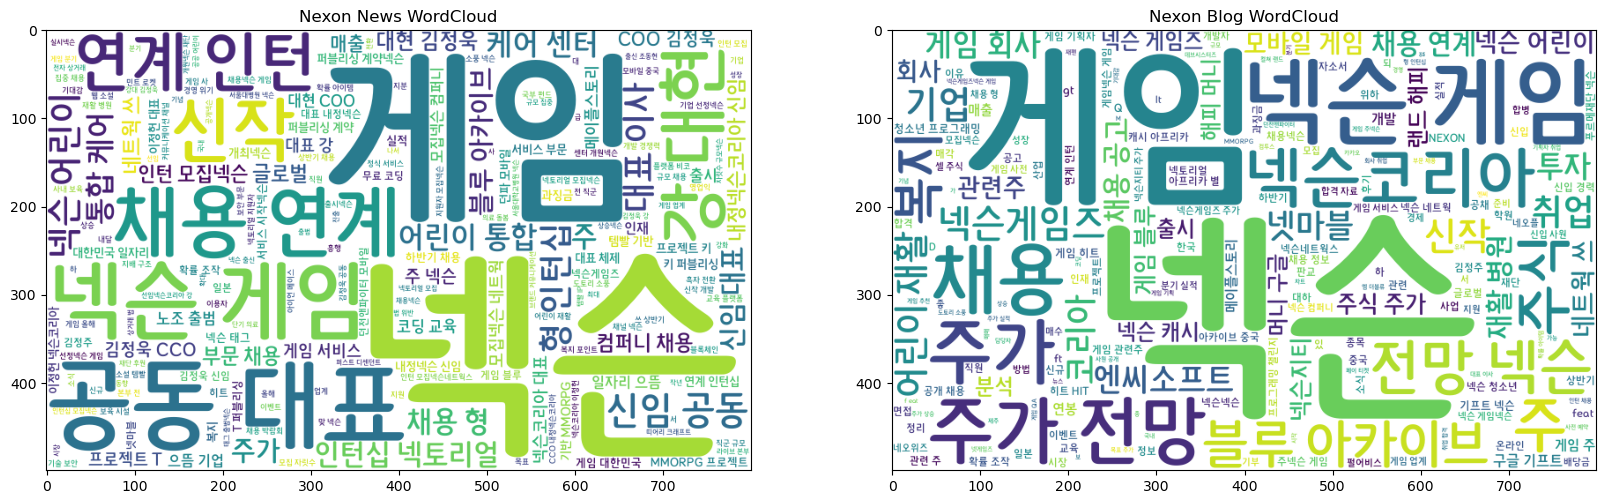

In [92]:
## nexon 내용만 추출
nexon_news = df.loc[df.category == 'nexon_news']
nexon_blog = df.loc[df.category == 'nexon_blog']
news = ''
blog = ''

for _, row in nexon_news.iterrows():
    news += extract_pos(row['title'])

for _, row in nexon_blog.iterrows():
    blog += extract_pos(row['title'])

## WordCloud 설정
news_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(news)
blog_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(blog)

nexon_news_arr = news_cloud.to_array()
nexon_blog_arr = blog_cloud.to_array()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(nexon_news_arr)
ax1.set_title('Nexon News WordCloud')

ax2.imshow(nexon_blog_arr)
ax2.set_title('Nexon Blog WordCloud')

plt.show()

##### *2-3. Netmarble WordCloud*

c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


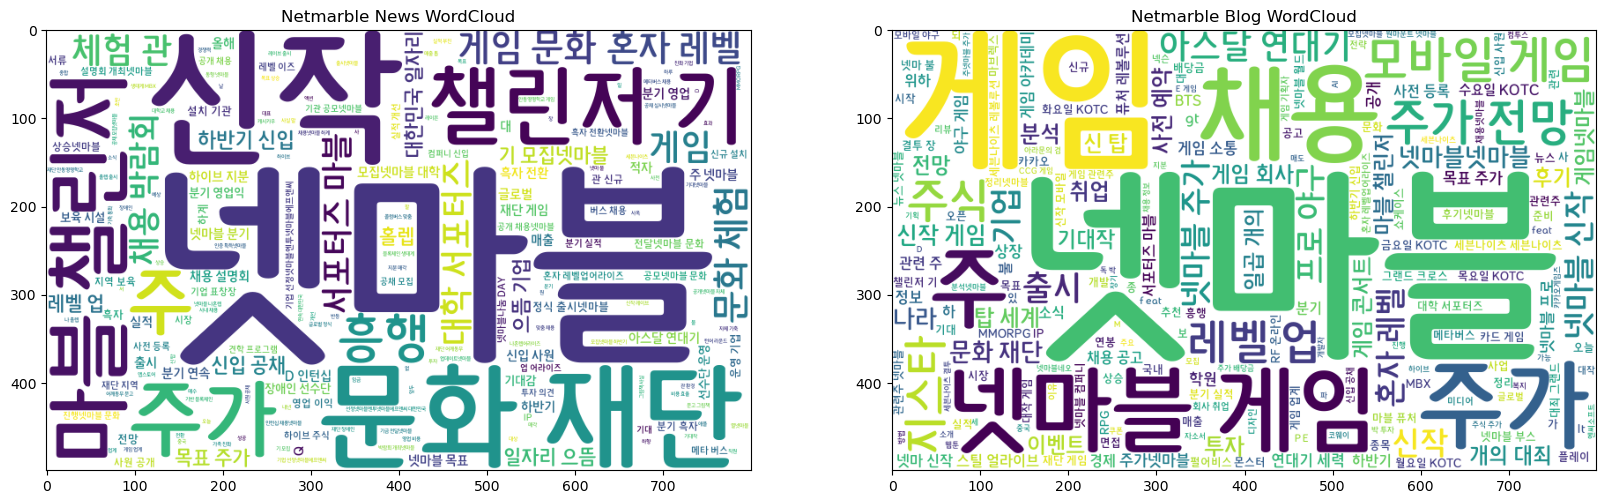

In [93]:
## netmarble 내용만 추출
netmarble_news = df.loc[df.category == 'netmarble_news']
netmarble_blog = df.loc[df.category == 'netmarble_blog']
news = ''
blog = ''

for _, row in netmarble_news.iterrows():
    news += extract_pos(row['title'])

for _, row in netmarble_blog.iterrows():
    blog += extract_pos(row['title'])

## WordCloud 설정
news_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(news)
blog_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(blog)

netmarble_news_arr = news_cloud.to_array()
netmarble_blog_arr = blog_cloud.to_array()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(netmarble_news_arr)
ax1.set_title('Netmarble News WordCloud')

ax2.imshow(netmarble_blog_arr)
ax2.set_title('Netmarble Blog WordCloud')

plt.show()

##### *2-4. NCsoft WordCloud*

c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


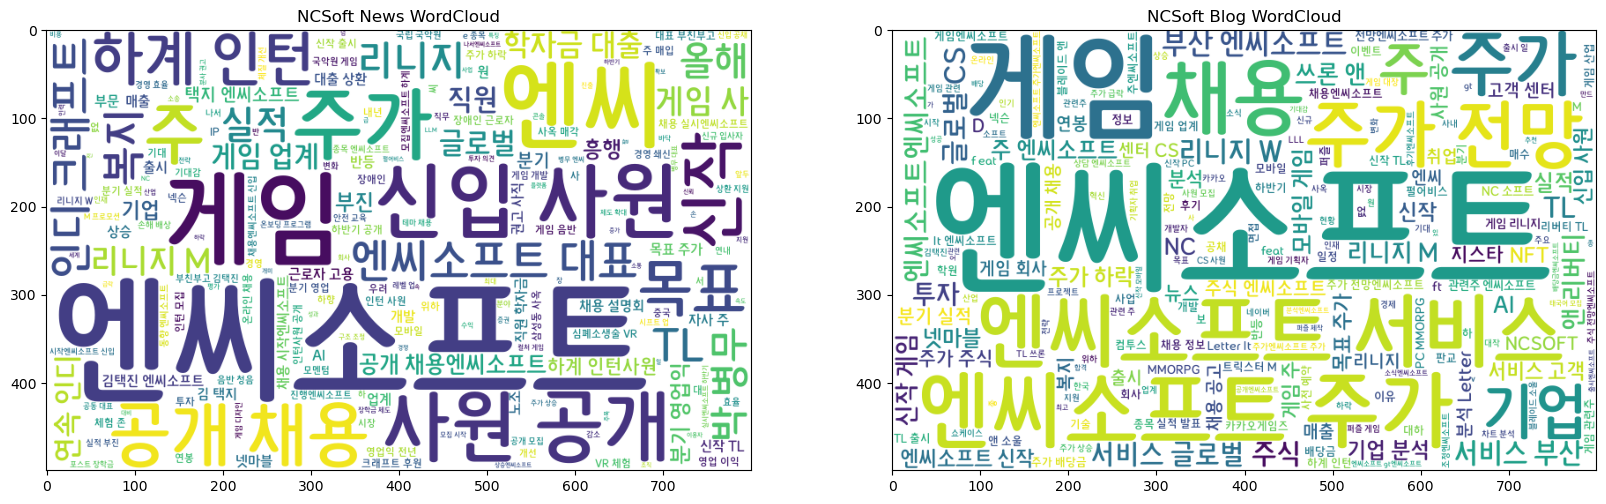

In [94]:
## ncsoft 내용만 추출
ncsoft_news = df.loc[df.category == 'ncsoft_news']
ncsoft_blog = df.loc[df.category == 'ncsoft_blog']
news = ''
blog = ''

for _, row in ncsoft_news.iterrows():
    news += extract_pos(row['title'])

for _, row in ncsoft_blog.iterrows():
    blog += extract_pos(row['title'])

## WordCloud 설정
news_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(news)
blog_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(blog)

ncsoft_news_arr = news_cloud.to_array()
ncsoft_blog_arr = blog_cloud.to_array()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(ncsoft_news_arr)
ax1.set_title('NCSoft News WordCloud')

ax2.imshow(ncsoft_blog_arr)
ax2.set_title('NCSoft Blog WordCloud')

plt.show()

##### *2-5 Riot WordCloud*

c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\82109\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


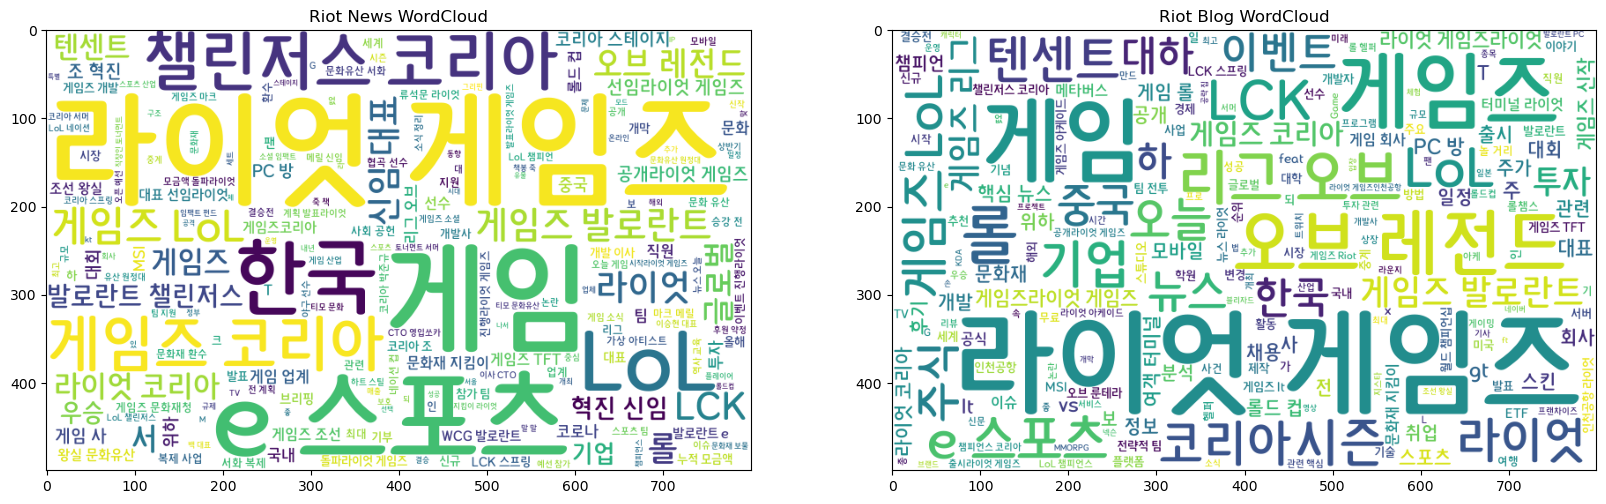

In [95]:
## riot 내용만 추출
riot_news = df.loc[df.category == 'riot_news']
riot_blog = df.loc[df.category == 'riot_blog']
news = ''
blog = ''

for _, row in riot_news.iterrows():
    news += extract_pos(row['title2'])

for _, row in riot_blog.iterrows():
    blog += extract_pos(row['title2'])

## WordCloud 설정
news_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(news)
blog_cloud = WordCloud(font_path = font_path, background_color='white', width=800, height=500).generate_from_text(blog)

riot_news_arr = news_cloud.to_array()
riot_blog_arr = blog_cloud.to_array()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(riot_news_arr)
ax1.set_title('Riot News WordCloud')

ax2.imshow(riot_blog_arr)
ax2.set_title('Riot Blog WordCloud')

plt.show()

#### **3. 게임사 5곳 LDA 토픽 모델링**
##### *3-1. 크래프톤 LDA*

In [100]:
from kiwipiepy.utils import Stopwords
from gensim import corpora
import gensim
from IPython.core.display import HTML
import pyLDAvis.gensim_models

stopwords = Stopwords()

## 게임사 이름과 뉴스, 블로그 등의 키워드는 포함되지 않도록 불용어 설정
stopwords_set = set(['크래프톤', '넥슨', '넥슨 게임즈', '라이엇', '라이엇 게임즈', '라이엇코리아', '엔씨', '엔씨소프트', '넷마블', '뉴스', '블로그'])
for i in stopwords_set:
    stopwords.add(i)

## LDA 토픽 모델링 함수
def preprocess_korean_LDA(text, stopwords):
    result = []
    tokens = kiwi.tokenize(text, normalize_coda=True)
    for token in tokens:
        if token.tag in ['NNG', 'NNP', 'SL'] and token.form not in stopwords:
            result.append(token.form)
    return result

In [102]:
krafton_news = df.loc[df.category == 'krafton_news']
krafton_blog = df.loc[df.category == 'krafton_blog']

## DataFrame에서 'title'과 'body' 결합
krafton_news['text_combined'] = krafton_news['title'] + " " + krafton_news['body']
krafton_blog['text_combined'] = krafton_blog['title'] + " " + krafton_blog['body']

## stopwords 리스트를 함수 호출 시 매개변수로 전달
krafton_news['LDA'] = krafton_news['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
krafton_blog['LDA'] = krafton_blog['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
krafton = pd.concat([krafton_news, krafton_blog], axis=0, ignore_index=True)

C:\Users\82109\AppData\Local\Temp\ipykernel_8256\507705740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krafton_news['text_combined'] = krafton_news['title'] + " " + krafton_news['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\507705740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krafton_blog['text_combined'] = krafton_blog['title'] + " " + krafton_blog['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\507705740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

In [108]:
word_dict = corpora.Dictionary(krafton['LDA'])
corpus = [word_dict.doc2bow(text) for text in krafton['LDA']]

## lDA 모델 훈련 - 5개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=word_dict)

## 각 토픽별 대표 단어 출력
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

## LDA 시각화
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)

## 대시보드
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

(0, '0.013*"게임" + 0.012*"채용" + 0.010*"경력" + 0.010*"주" + 0.009*"기업" + 0.008*"지원" + 0.007*"교육" + 0.007*"모집" + 0.006*"시작" + 0.006*"신입"')
(1, '0.013*"게임" + 0.010*"전" + 0.008*"기업" + 0.006*"회사" + 0.004*"개발" + 0.004*"AI" + 0.004*"일" + 0.004*"청약" + 0.004*"사람" + 0.003*"시간"')
(2, '0.012*"게임" + 0.011*"투자" + 0.009*"주가" + 0.008*"매출" + 0.007*"분기" + 0.007*"이익" + 0.006*"시장" + 0.006*"실적" + 0.006*"영업" + 0.006*"전망"')
(3, '0.034*"전" + 0.012*"이데일리" + 0.011*"증권" + 0.008*"플러스" + 0.007*"기업" + 0.007*"뉴시스" + 0.006*"경제" + 0.006*"파이낸셜뉴스" + 0.005*"투자" + 0.005*"시장"')
(4, '0.022*"전" + 0.012*"게임" + 0.010*"상승" + 0.008*"경제" + 0.007*"주" + 0.006*"시장" + 0.006*"투자" + 0.005*"하락" + 0.005*"기업" + 0.004*"한국"')


##### *3-2. 넥슨 LDA*

In [110]:
nexon_news = df.loc[df.category == 'nexon_news']
nexon_blog = df.loc[df.category == 'nexon_blog']

## DataFrame에서 'title'과 'body' 결합
nexon_news['text_combined'] = nexon_news['title'] + " " + nexon_news['body']
nexon_blog['text_combined'] = nexon_blog['title'] + " " + nexon_blog['body']

## stopwords 리스트를 함수 호출 시 매개변수로 전달
nexon_news['LDA'] = nexon_news['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
nexon_blog['LDA'] = nexon_blog['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
nexon = pd.concat([nexon_news, nexon_blog], axis=0, ignore_index=True)

C:\Users\82109\AppData\Local\Temp\ipykernel_8256\508342178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nexon_news['text_combined'] = nexon_news['title'] + " " + nexon_news['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\508342178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nexon_blog['text_combined'] = nexon_blog['title'] + " " + nexon_blog['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\508342178.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [111]:
word_dict = corpora.Dictionary(nexon['LDA'])
corpus = [word_dict.doc2bow(text) for text in nexon['LDA']]

## lDA 모델 훈련 - 5개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=word_dict)

## 각 토픽별 대표 단어 출력
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

## LDA 시각화
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)

## 대시보드
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

(0, '0.014*"상품권" + 0.013*"게임" + 0.013*"페이" + 0.010*"굿" + 0.010*"카드" + 0.009*"복지" + 0.008*"상품" + 0.008*"모바일" + 0.007*"가능" + 0.006*"사용"')
(1, '0.010*"글" + 0.008*"게임" + 0.008*"기업" + 0.006*"회사" + 0.005*"대표" + 0.005*"사회" + 0.005*"직원" + 0.005*"문화" + 0.005*"이동" + 0.005*"일"')
(2, '0.035*"게임" + 0.011*"채용" + 0.010*"지원" + 0.008*"복지" + 0.008*"회사" + 0.007*"개발" + 0.007*"직원" + 0.006*"기업" + 0.005*"진행" + 0.005*"다양"')
(3, '0.030*"게임" + 0.012*"병원" + 0.011*"어린이" + 0.011*"회사" + 0.010*"재활" + 0.009*"복지" + 0.008*"지원" + 0.008*"취업" + 0.006*"생각" + 0.005*"글"')
(4, '0.026*"게임" + 0.007*"주가" + 0.006*"회사" + 0.006*"기업" + 0.005*"생각" + 0.005*"주" + 0.004*"개발" + 0.004*"상승" + 0.004*"가능" + 0.004*"때"')


##### *3-3. 넷마블 LDA*

In [124]:
netmarble_news = df.loc[df.category == 'netmarble_news']
netmarble_blog = df.loc[df.category == 'netmarble_blog']

## DataFrame에서 'title'과 'body' 결합
netmarble_news['text_combined'] = netmarble_news['title'] + " " + netmarble_news['body']
netmarble_blog['text_combined'] = netmarble_blog['title'] + " " + netmarble_blog['body']

## stopwords 리스트를 함수 호출 시 매개변수로 전달
netmarble_news['LDA'] = netmarble_news['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
netmarble_blog['LDA'] = netmarble_blog['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
netmarble = pd.concat([netmarble_news, netmarble_blog], axis=0, ignore_index=True)

C:\Users\82109\AppData\Local\Temp\ipykernel_8256\1919540755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netmarble_news['text_combined'] = netmarble_news['title'] + " " + netmarble_news['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\1919540755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netmarble_blog['text_combined'] = netmarble_blog['title'] + " " + netmarble_blog['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\1919540755.py:9: SettingWithCopyWarning: 
A value is trying t

In [125]:
word_dict = corpora.Dictionary(netmarble['LDA'])
corpus = [word_dict.doc2bow(text) for text in netmarble['LDA']]

## lDA 모델 훈련 - 5개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=word_dict)

## 각 토픽별 대표 단어 출력
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

## LDA 시각화
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)

## 대시보드
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

(0, '0.011*"게임" + 0.011*"AI" + 0.009*"전" + 0.006*"기업" + 0.005*"주" + 0.005*"경제" + 0.004*"기술" + 0.004*"개발" + 0.004*"지원" + 0.004*"상승"')
(1, '0.034*"게임" + 0.013*"세븐나이츠" + 0.007*"진행" + 0.006*"모바일" + 0.006*"글" + 0.006*"캐릭터" + 0.006*"출시" + 0.006*"플레이" + 0.005*"이벤트" + 0.005*"사전"')
(2, '0.009*"게임" + 0.007*"url" + 0.007*"가문" + 0.006*"배우" + 0.006*"t" + 0.006*"I" + 0.005*"연예인" + 0.004*"T" + 0.004*"S" + 0.004*"의원"')
(3, '0.011*"기업" + 0.004*"전" + 0.004*"한국" + 0.004*"문화" + 0.004*"시간" + 0.003*"게임" + 0.003*"경제" + 0.003*"산업" + 0.003*"복지" + 0.003*"사회"')
(4, '0.020*"게임" + 0.006*"분기" + 0.006*"투자" + 0.005*"대비" + 0.005*"H" + 0.005*"전" + 0.005*"한국" + 0.005*"시장" + 0.005*"바이오" + 0.004*"매출"')


##### *3-4. 엔씨소프트 LDA*

In [126]:
ncsoft_news = df.loc[df.category == 'ncsoft_news']
ncsoft_blog = df.loc[df.category == 'ncsoft_blog']

## DataFrame에서 'title'과 'body' 결합
ncsoft_news['text_combined'] = ncsoft_news['title'] + " " + ncsoft_news['body']
ncsoft_blog['text_combined'] = ncsoft_blog['title'] + " " + ncsoft_blog['body']

## stopwords 리스트를 함수 호출 시 매개변수로 전달
ncsoft_news['LDA'] = ncsoft_news['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
ncsoft_blog['LDA'] = ncsoft_blog['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
ncsoft = pd.concat([ncsoft_news, ncsoft_blog], axis=0, ignore_index=True)

C:\Users\82109\AppData\Local\Temp\ipykernel_8256\3654682459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncsoft_news['text_combined'] = ncsoft_news['title'] + " " + ncsoft_news['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\3654682459.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncsoft_blog['text_combined'] = ncsoft_blog['title'] + " " + ncsoft_blog['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\3654682459.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [127]:
word_dict = corpora.Dictionary(ncsoft['LDA'])
corpus = [word_dict.doc2bow(text) for text in ncsoft['LDA']]

## lDA 모델 훈련 - 5개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=word_dict)

## 각 토픽별 대표 단어 출력
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

## LDA 시각화
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)

## 대시보드
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

(0, '0.027*"게임" + 0.014*"리니지" + 0.009*"장애인" + 0.007*"출시" + 0.006*"j" + 0.005*"기업" + 0.004*"주가" + 0.004*"매출" + 0.004*"M" + 0.004*"진행"')
(1, '0.009*"기업" + 0.007*"전" + 0.005*"AI" + 0.005*"경제" + 0.005*"회사" + 0.004*"한국" + 0.004*"복지" + 0.003*"퍼즐" + 0.003*"지원" + 0.003*"교육"')
(2, '0.036*"게임" + 0.009*"AI" + 0.009*"채용" + 0.008*"개발" + 0.006*"취업" + 0.006*"학원" + 0.005*"회사" + 0.004*"글" + 0.004*"지원" + 0.004*"진행"')
(3, '0.016*"전" + 0.009*"주가" + 0.008*"투자" + 0.008*"상승" + 0.008*"게임" + 0.008*"시장" + 0.007*"주식" + 0.007*"주" + 0.006*"가격" + 0.006*"기업"')
(4, '0.025*"게임" + 0.008*"매출" + 0.008*"시장" + 0.006*"전" + 0.006*"기업" + 0.006*"투자" + 0.005*"이익" + 0.005*"영업" + 0.005*"리니지" + 0.005*"한국"')


##### *3-5. 라이엇게임즈 LDA*

In [128]:
riot_news = df.loc[df.category == 'riot_news']
riot_blog = df.loc[df.category == 'riot_blog']

## DataFrame에서 'title'과 'body' 결합
riot_news['text_combined'] = riot_news['title'] + " " + riot_news['body']
riot_blog['text_combined'] = riot_blog['title'] + " " + riot_blog['body']

## stopwords 리스트를 함수 호출 시 매개변수로 전달
riot_news['LDA'] = riot_news['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
riot_blog['LDA'] = riot_blog['text_combined'].apply(lambda x: preprocess_korean_LDA(x, stopwords_set))
riot = pd.concat([riot_news, riot_blog], axis=0, ignore_index=True)

C:\Users\82109\AppData\Local\Temp\ipykernel_8256\2251476814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riot_news['text_combined'] = riot_news['title'] + " " + riot_news['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\2251476814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riot_blog['text_combined'] = riot_blog['title'] + " " + riot_blog['body']
C:\Users\82109\AppData\Local\Temp\ipykernel_8256\2251476814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [129]:
word_dict = corpora.Dictionary(riot['LDA'])
corpus = [word_dict.doc2bow(text) for text in riot['LDA']]

## lDA 모델 훈련 - 5개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=word_dict)

## 각 토픽별 대표 단어 출력
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

## LDA 시각화
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, word_dict)

## 대시보드
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

(0, '0.014*"게임" + 0.011*"팀" + 0.008*"진행" + 0.007*"기부" + 0.007*"게임즈" + 0.007*"글" + 0.007*"스포츠" + 0.006*"LCK" + 0.005*"리그" + 0.005*"대회"')
(1, '0.010*"기부" + 0.008*"게임" + 0.007*"코로나" + 0.005*"url" + 0.004*"마스크" + 0.004*"사람" + 0.004*"I" + 0.003*"때" + 0.003*"참여" + 0.003*"복지"')
(2, '0.019*"게임" + 0.010*"http" + 0.005*"me" + 0.004*"분양" + 0.004*"사업" + 0.004*"서비스" + 0.004*"주택" + 0.004*"코로나" + 0.003*"대표" + 0.003*"한국"')
(3, '0.013*"스포츠" + 0.011*"게임" + 0.008*"e" + 0.007*"선수" + 0.005*"do" + 0.005*"글" + 0.004*"팀" + 0.004*"모바일" + 0.004*"시장" + 0.003*"산업"')
(4, '0.011*"전" + 0.007*"게임" + 0.007*"중국" + 0.006*"기업" + 0.005*"미국" + 0.004*"시간" + 0.004*"시장" + 0.003*"투자" + 0.003*"진" + 0.003*"경제"')


#### **4. 게임사 5곳 유사도분석**
- 히트맵, 상관계수를 표로 만들어서 분석
- 토큰화 후 명사, 동사, 형용사, 외국어만 활용해 분석
- Jaccard Similarity, Cosine Similarity 분석

In [4]:
krafton_news = df.loc[df.category == 'krafton_news']
krafton_blog = df.loc[df.category == 'krafton_blog']
nexon_news = df.loc[df.category == 'nexon_news']
nexon_blog = df.loc[df.category == 'nexon_blog']
netmarble_news = df.loc[df.category == 'netmarble_news']
netmarble_blog = df.loc[df.category == 'netmarble_blog']
ncsoft_news = df.loc[df.category == 'ncsoft_news']
ncsoft_blog = df.loc[df.category == 'ncsoft_blog']
riot_news = df.loc[df.category == 'riot_news']
riot_blog = df.loc[df.category == 'riot_blog']

##### *4-1. 제목 (title) 에 대한 자카드 유사도 분석*

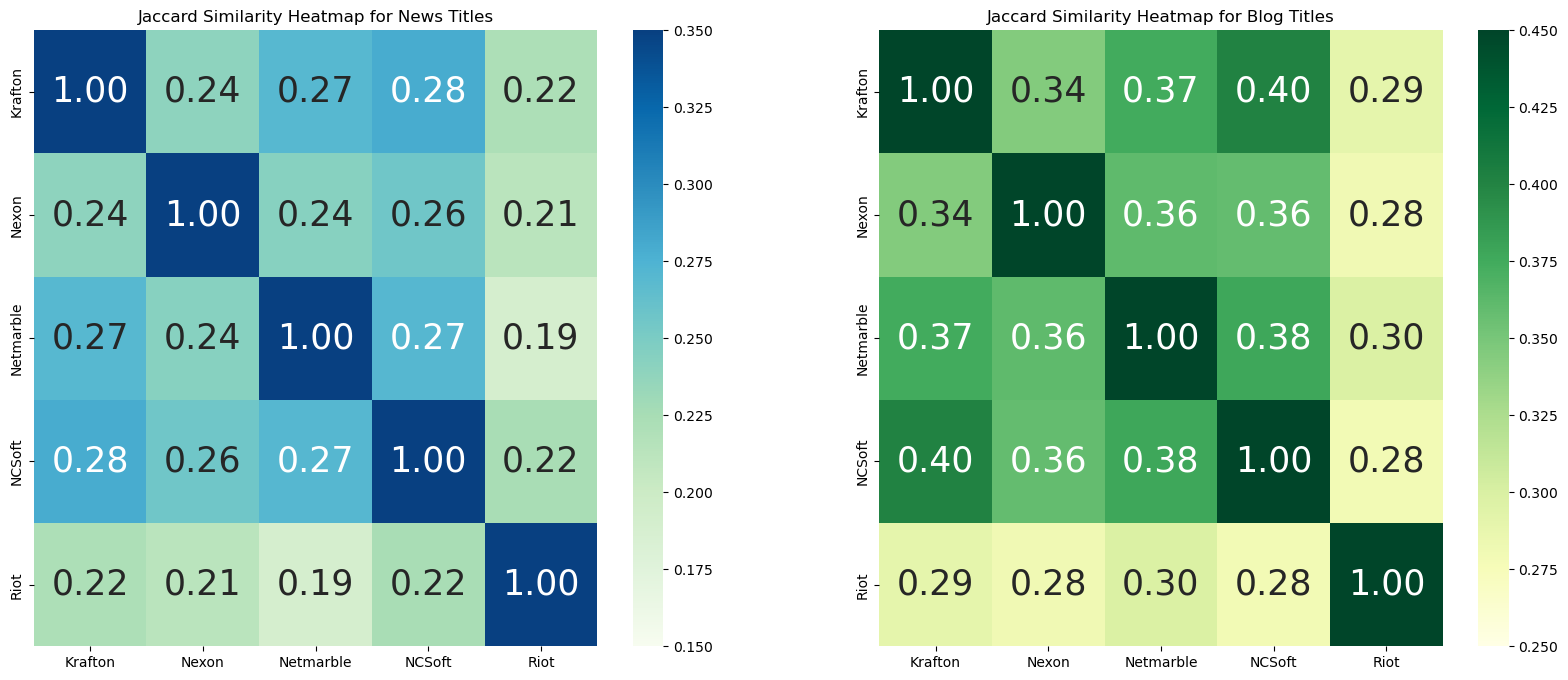

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from kiwipiepy import Kiwi

## 형태소 분석기 초기화
kiwi = Kiwi()

def extract_important_words(text, n=1000):
    ## 텍스트를 입력받아 명사, 동사, 형용사, 외국어를 추출하고 빈도수를 계산하여 상위 n개를 반환
    tokens = kiwi.analyze(text)
    words = []
    for token_list in tokens:
        for token in token_list[0]:
            if token.tag in ['NNG', 'NNP', 'VV', 'VA' 'SL']:  ## 명사, 동사, 형용사, 외국어
                words.append(token.form)
    return Counter(words).most_common(n)

def get_top_words(df, n=1000):
    ## DataFrame의 title 컬럼에 대해 형태소 분석을 적용
    all_words = df['title'].apply(lambda x: extract_important_words(x, n))
    all_words = [word for sublist in all_words for word, count in sublist]
    top_words = Counter(all_words).most_common(n)
    return set(dict(top_words).keys())

## 각 news data의 상위 1000개 명사, 동사, 형용사, 외국어 추출
krafton_news_top_words = get_top_words(krafton_news)
nexon_news_top_words = get_top_words(nexon_news)
netmarble_news_top_words = get_top_words(netmarble_news)
ncsoft_news_top_words = get_top_words(ncsoft_news)
riot_news_top_words = get_top_words(riot_news)

## 각 blog data의 상위 1000개 명사, 동사, 형용사, 외국어 추출
krafton_blog_top_words = get_top_words(krafton_blog)
nexon_blog_top_words = get_top_words(nexon_blog)
netmarble_blog_top_words = get_top_words(netmarble_blog)
ncsoft_blog_top_words = get_top_words(ncsoft_blog)
riot_blog_top_words = get_top_words(riot_blog)

## 자카드 유사도 함수 정의
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    if union == 0 : return 0
    return intersection / union

## 유사도 행렬 생성
news_dfs = [krafton_news_top_words, nexon_news_top_words, netmarble_news_top_words, ncsoft_news_top_words, riot_news_top_words]
blog_dfs = [krafton_blog_top_words, nexon_blog_top_words, netmarble_blog_top_words, ncsoft_blog_top_words, riot_blog_top_words]
news_sim_matrix = pd.DataFrame(index=range(1, 6), columns=range(1, 6))
blog_sim_matrix = pd.DataFrame(index=range(1, 6), columns=range(1, 6))

for i in range(5):
    for j in range(5):
        news_sim_matrix.iloc[i, j] = jaccard_similarity(news_dfs[i], news_dfs[j])
        blog_sim_matrix.iloc[i, j] = jaccard_similarity(blog_dfs[i], blog_dfs[j])

## 히트맵 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(news_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='GnBu', 
            vmin=0.15, vmax=0.35, annot_kws={"size": 25}, ax=ax1,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
             yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax1.set_title("Jaccard Similarity Heatmap for News Titles")
sns.heatmap(blog_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='YlGn',
            vmin=0.25, vmax=0.45, annot_kws={"size": 25}, ax=ax2,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
            yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax2.set_title("Jaccard Similarity Heatmap for Blog Titles")
plt.show()

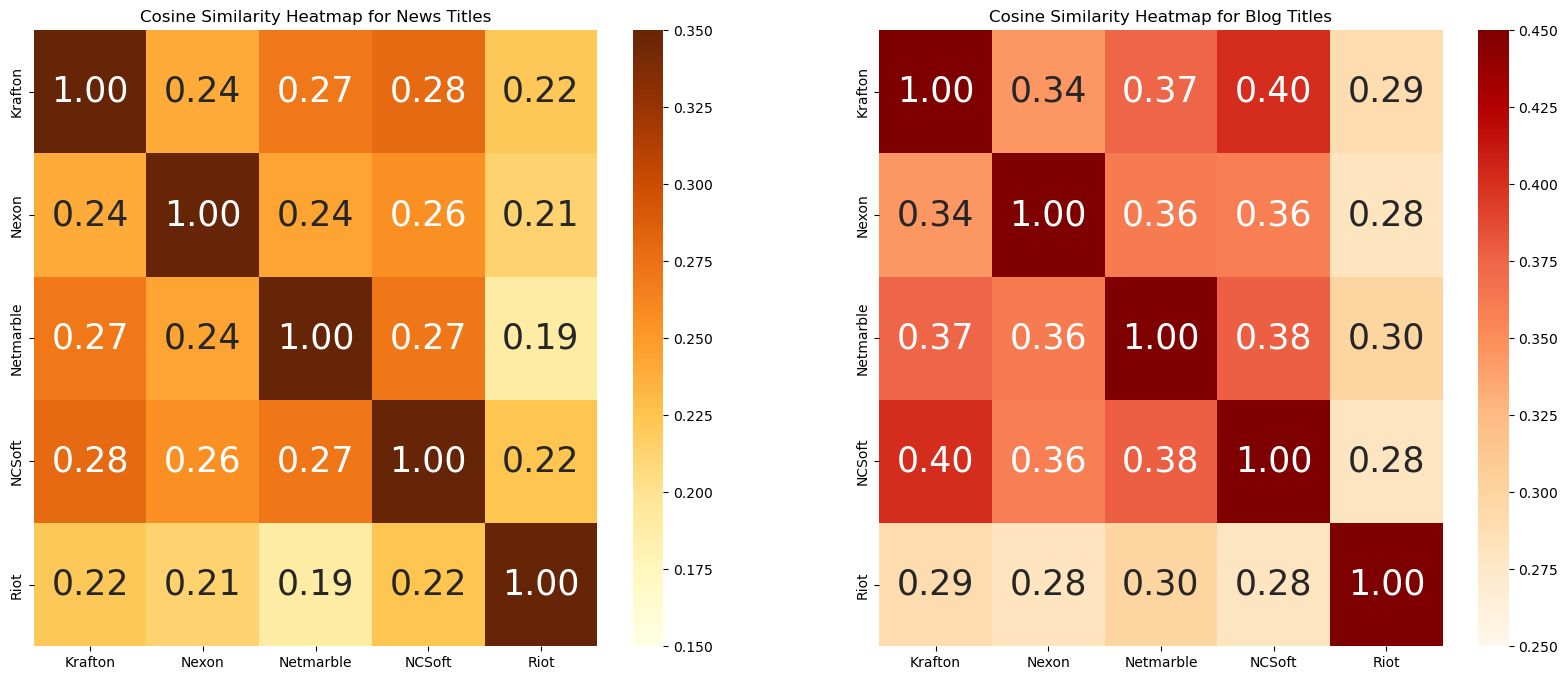

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 텍스트 데이터를 TF-IDF 벡터로 변환하는 함수
def tfidf_transform(list_of_docs):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(list_of_docs)
    return tfidf_matrix

## 유사도 행렬 생성
news_dfs = [krafton_news_top_words, nexon_news_top_words, netmarble_news_top_words, ncsoft_news_top_words, riot_news_top_words]
blog_dfs = [krafton_blog_top_words, nexon_blog_top_words, netmarble_blog_top_words, ncsoft_blog_top_words, riot_blog_top_words]

# 각 게임사의 title 데이터를 합친 뒤 TF-IDF 벡터로 변환
news_titles = [" ".join(words) for words in news_dfs]  # news_dfs는 단어 리스트의 리스트
blog_titles = [" ".join(words) for words in blog_dfs]

news_tfidf_matrix = tfidf_transform(news_titles)
blog_tfidf_matrix = tfidf_transform(blog_titles)

# 코사인 유사도 행렬 계산
news_cos_sim_matrix = cosine_similarity(news_tfidf_matrix)
blog_cos_sim_matrix = cosine_similarity(blog_tfidf_matrix)

# 히트맵 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(news_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='YlOrBr', 
            vmin=0.15, vmax=0.35, annot_kws={"size": 25}, ax=ax1,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
             yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax1.set_title("Cosine Similarity Heatmap for News Titles")
sns.heatmap(blog_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='OrRd',
            vmin=0.25, vmax=0.45, annot_kws={"size": 25}, ax=ax2,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
            yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax2.set_title("Cosine Similarity Heatmap for Blog Titles")
plt.show()

##### *4-2. 본문 내용 (body) 에 대한 유사도 분석*

In [13]:
## body에 대해서 상위 1000개 단어만 추출
def get_top_words(df, n=1000):
    # DataFrame의 title 컬럼에 대해 형태소 분석을 적용
    all_words = df['body'].apply(lambda x: extract_important_words(x, n))
    all_words = [word for sublist in all_words for word, count in sublist]
    top_words = Counter(all_words).most_common(n)
    return set(dict(top_words).keys())

## 각 news data의 상위 1000개 명사, 동사, 형용사 추출
krafton_news_top_words = get_top_words(krafton_news)
nexon_news_top_words = get_top_words(nexon_news)
netmarble_news_top_words = get_top_words(netmarble_news)
ncsoft_news_top_words = get_top_words(ncsoft_news)
riot_news_top_words = get_top_words(riot_news)

## 각 blog data의 상위 1000개 명사, 동사, 형용사 추출
krafton_blog_top_words = get_top_words(krafton_blog)
nexon_blog_top_words = get_top_words(nexon_blog)
netmarble_blog_top_words = get_top_words(netmarble_blog)
ncsoft_blog_top_words = get_top_words(ncsoft_blog)
riot_blog_top_words = get_top_words(riot_blog)

## 자카드 유사도 함수 정의
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    if union == 0:
        return 0
    return intersection / union

## 유사도 행렬 생성
news_dfs = [krafton_news_top_words, nexon_news_top_words, netmarble_news_top_words, ncsoft_news_top_words, riot_news_top_words]
blog_dfs = [krafton_blog_top_words, nexon_blog_top_words, netmarble_blog_top_words, ncsoft_blog_top_words, riot_blog_top_words]

news_sim_matrix = pd.DataFrame(index=range(1, 6), columns=range(1, 6))
blog_sim_matrix = pd.DataFrame(index=range(1, 6), columns=range(1, 6))

for i in range(5):
    for j in range(5):
        news_sim_matrix.iloc[i, j] = jaccard_similarity(news_dfs[i], news_dfs[j])
        blog_sim_matrix.iloc[i, j] = jaccard_similarity(blog_dfs[i], blog_dfs[j])

# 히트맵 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(news_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='GnBu', 
            vmin=0.4, vmax=0.65, annot_kws={"size": 25}, ax=ax1,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
             yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax1.set_title("Jaccard Similarity Heatmap for News Contents")
sns.heatmap(blog_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='YlGn',
            vmin=0.6, vmax=0.75, annot_kws={"size": 25}, ax=ax2,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
            yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax2.set_title("Jaccard Similarity Heatmap for Blog Contents")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\82109\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\82109\AppData\Local\Temp\ipykernel_2796\335588364.py", line 10, in <module>
    krafton_news_top_words = get_top_words(krafton_news)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\82109\AppData\Local\Temp\ipykernel_2796\335588364.py", line 4, in get_top_words
    all_words = df['body'].apply(lambda x: extract_important_words(x, n))
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\anaconda3\Lib\site-packages\pandas\core\series.py", line 4630, in apply
    return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82109\anaconda3\Lib\site-packages\pandas\core\apply.py", line 1025, in apply
    return self.a

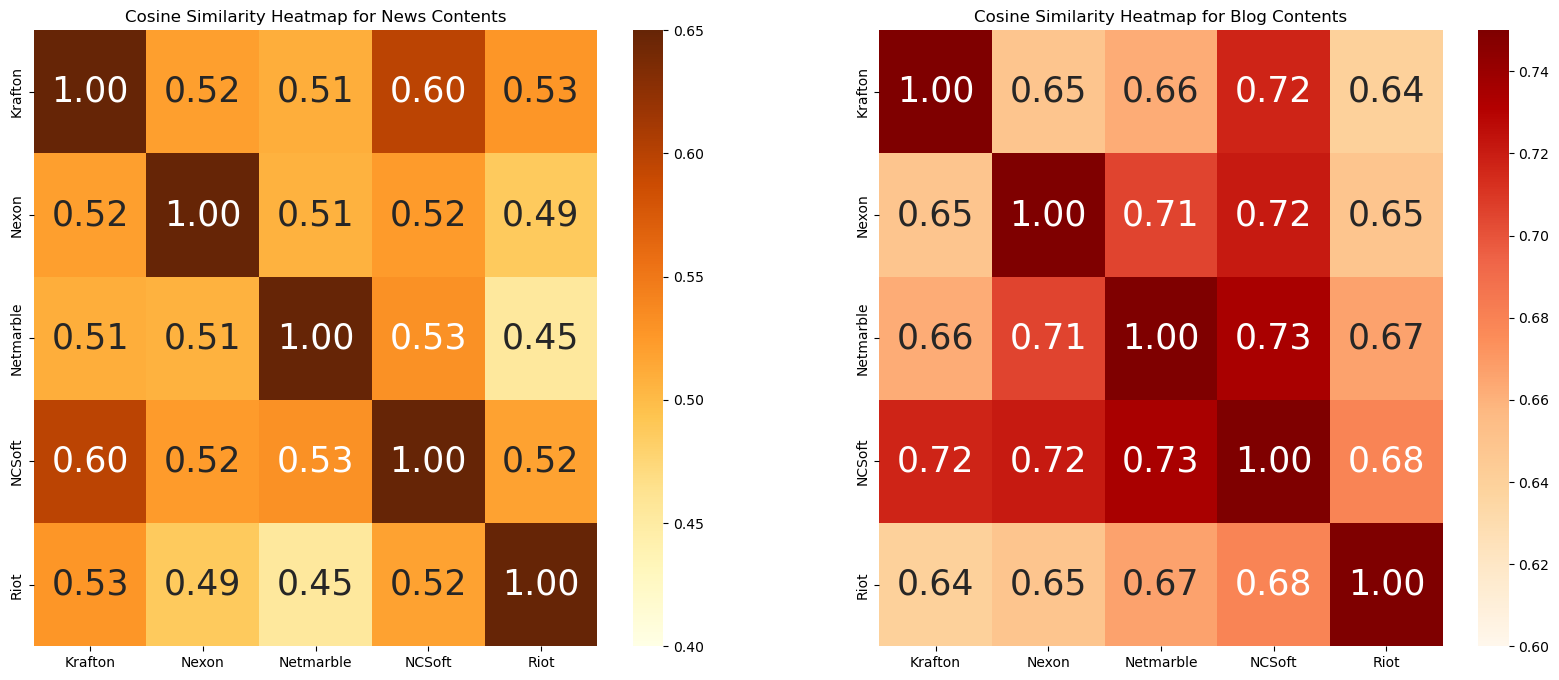

In [14]:
# 텍스트 데이터를 TF-IDF 벡터로 변환하는 함수
def tfidf_transform(list_of_docs):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(list_of_docs)
    return tfidf_matrix

## 유사도 행렬 생성
news_dfs = [krafton_news_top_words, nexon_news_top_words, netmarble_news_top_words, ncsoft_news_top_words, riot_news_top_words]
blog_dfs = [krafton_blog_top_words, nexon_blog_top_words, netmarble_blog_top_words, ncsoft_blog_top_words, riot_blog_top_words]

# 각 게임사의 title 데이터를 합친 뒤 TF-IDF 벡터로 변환
news_titles = [" ".join(words) for words in news_dfs]  # news_dfs는 단어 리스트의 리스트
blog_titles = [" ".join(words) for words in blog_dfs]

news_tfidf_matrix = tfidf_transform(news_titles)
blog_tfidf_matrix = tfidf_transform(blog_titles)

# 코사인 유사도 행렬 계산
news_cos_sim_matrix = cosine_similarity(news_tfidf_matrix)
blog_cos_sim_matrix = cosine_similarity(blog_tfidf_matrix)

# 히트맵 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(news_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='YlOrBr', 
            vmin=0.4, vmax=0.65, annot_kws={"size": 25}, ax=ax1,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
             yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax1.set_title("Cosine Similarity Heatmap for News Contents")
sns.heatmap(blog_sim_matrix.astype(float), annot=True, fmt=".2f", cmap='OrRd',
            vmin=0.6, vmax=0.75, annot_kws={"size": 25}, ax=ax2,
            xticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"], 
            yticklabels=["Krafton", "Nexon", "Netmarble", "NCSoft", "Riot"])
ax2.set_title("Cosine Similarity Heatmap for Blog Contents")
plt.show()
